In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape ", X_train.shape)
print("y_train original shape ", y_train.shape)
print("X_test original shape ", X_test.shape)
print("y_test original shape ", y_test.shape)

X_train original shape  (60000, 28, 28)
y_train original shape  (60000,)
X_test original shape  (10000, 28, 28)
y_test original shape  (10000,)


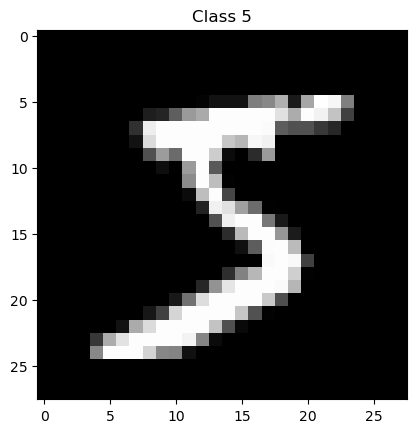

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class ' + str(y_train[0]))
plt.show()

In [5]:
features_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
features_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
# Normalization
features_train = features_train / 255
features_test = features_test / 255

In [8]:
# One-hot encoding
targets_train = np_utils.to_categorical(y_train, 10)
targets_test = np_utils.to_categorical(y_test, 10)

In [9]:
model = Sequential()
# Convolutional layers
# 28 x 28 pixels images
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

In [10]:
# Deep neural network layers
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
# regularization to avoid overfitting
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                      

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(features_train, targets_train, batch_size=128, epochs=5,
          validation_data=(features_test, targets_test), verbose=1)
score = model.evaluate(features_test, targets_test)
print('Test accuracy: %.2f' % score[1])

Epoch 1/5


2023-08-02 20:00:27.576320: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 31s 66ms/step - loss: 0.0971 - accuracy: 0.9704 - val_loss: 1.2474 - val_accuracy: 0.6270
Epoch 2/5
469/469 [==============================] - 32s 68ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0317 - val_accuracy: 0.9905
Epoch 3/5
469/469 [==============================] - 32s 68ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0400 - val_accuracy: 0.9885
Epoch 4/5
469/469 [==============================] - 32s 67ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0262 - val_accuracy: 0.9923
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0227 - accuracy: 0.9922
Test accuracy: 0.99


In [13]:
# Data augmentation - applies random transformations on images (reduces overfitting)
train_generator = ImageDataGenerator(rotation_range=7, width_shift_range=0.05, shear_range=0.1,
                                     height_shift_range=0.07, zoom_range=0.05)
test_generator = ImageDataGenerator()

train_generator = train_generator.flow(features_train, targets_train, batch_size=64)
test_generator = test_generator.flow(features_test, targets_test, batch_size=64)

In [14]:
model.fit(train_generator, steps_per_epoch=60000//64, epochs=5,
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


/var/folders/t9/bz35l7d13rq7vfnm9vz97v0c0000gn/T/ipykernel_37158/703129682.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,
2023-08-02 20:05:35.036087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


937/937 [==============================] - ETA: 0s - loss: 0.0681 - accuracy: 0.9794

2023-08-02 20:06:09.633608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


937/937 [==============================] - 36s 39ms/step - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0251 - val_accuracy: 0.9928
Epoch 2/5
937/937 [==============================] - 37s 39ms/step - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.0224 - val_accuracy: 0.9922
Epoch 3/5
937/937 [==============================] - 36s 39ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0199 - val_accuracy: 0.9930
Epoch 4/5
937/937 [==============================] - 36s 39ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0224 - val_accuracy: 0.9918
Epoch 5/5
937/937 [==============================] - 36s 39ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0116 - val_accuracy: 0.9961
